(2830743, 79)
    Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   
2              49188               1                   2   
3              49188               1                   2   
4              49486               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   
2                        0                           12   
3                        0                           12   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   
2                             0                       6   
3                             0   

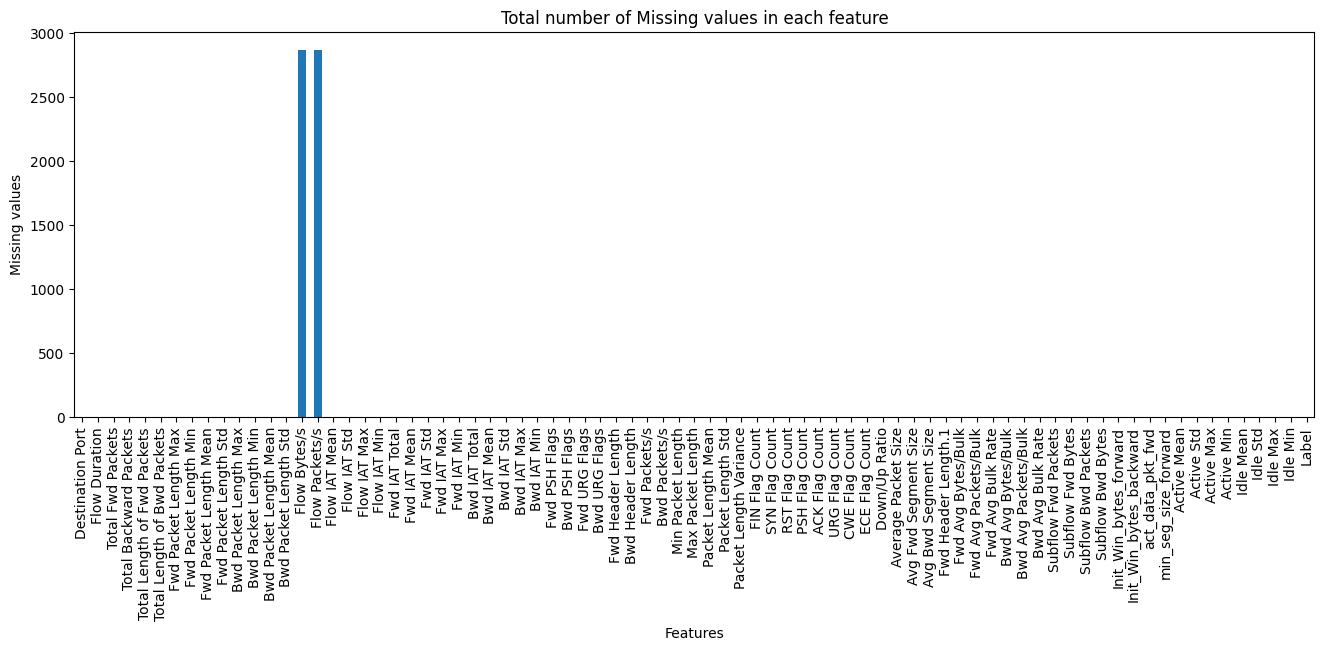

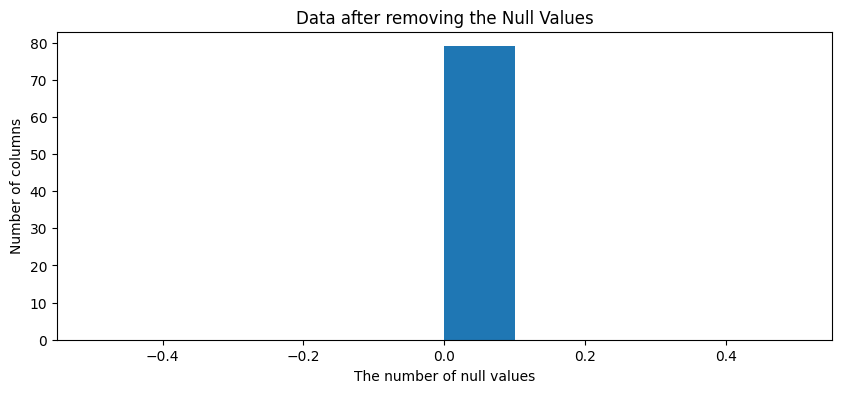

/tmp/ipykernel_1344794/2577991585.py:66: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


Label Mapping: {'BENIGN': np.int64(0), 'Bot': np.int64(1), 'DDoS': np.int64(2), 'DoS GoldenEye': np.int64(3), 'DoS Hulk': np.int64(4), 'DoS Slowhttptest': np.int64(5), 'DoS slowloris': np.int64(6), 'FTP-Patator': np.int64(7), 'Heartbleed': np.int64(8), 'Infiltration': np.int64(9), 'PortScan': np.int64(10), 'SSH-Patator': np.int64(11), 'Web Attack  Brute Force': np.int64(12), 'Web Attack  Sql Injection': np.int64(13), 'Web Attack  XSS': np.int64(14)}
Datasets combined, preprocessed, and saved successfully!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# List of dataset filenames
filenames = [
    './archive/Monday-WorkingHours.pcap_ISCX.csv',
    './archive/Tuesday-WorkingHours.pcap_ISCX.csv',
    './archive/Wednesday-workingHours.pcap_ISCX.csv',
    './archive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    './archive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    './archive/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    './archive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    './archive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
]

dataframes = [pd.read_csv(filename) for filename in filenames]
combined_df = pd.concat(dataframes, ignore_index=True)

print(combined_df.shape)
print(combined_df.head())

# Remove spaces before column names
combined_df.columns = combined_df.columns.str.strip()

# Clean label names to remove weird symbols
combined_df['Label'] = combined_df['Label'].str.replace('�', '')

# Check unique labels
print(combined_df['Label'].unique())

# Plot missing values
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(combined_df)

# Drop rows with missing values
data_f = combined_df.replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(1, figsize=(10, 4))
plt.hist(data_f.isna().sum())
plt.title('Data after removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')
plt.show()

# Handle infinite values
pd.set_option('use_inf_as_na', True)
null_values = data_f.isnull().sum()

# Encode labels
label_encoder = LabelEncoder()
data_f.loc[:, 'Label'] = label_encoder.fit_transform(data_f['Label'])

# Get the mapping of labels to their integer values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Separate features and labels
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save the combined and preprocessed data
data_f.to_csv('./data/combined_preprocessed_dataset.csv', index=False)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_train_df['Label'] = y_train.values
X_test_df['Label'] = y_test.values
X_train_df.to_csv('./data/train_dataset.csv', index=False)
X_test_df.to_csv('./data/test_dataset.csv', index=False)

print("Datasets combined, preprocessed, and saved successfully!")


In [4]:
# Load preprocessed datasets
train_df = pd.read_csv('./data/train_dataset.csv')
test_df = pd.read_csv('./data/test_dataset.csv')

# Separate features and labels
X_train = train_df.drop('Label', axis=1)
y_train = train_df['Label']
X_test = test_df.drop('Label', axis=1)
y_test = test_df['Label']


In [5]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


Random Forest Metrics: 
Accuracy : 0.9987
F1 Score : 0.9986
Precision : 0.9986
Recall : 0.9987


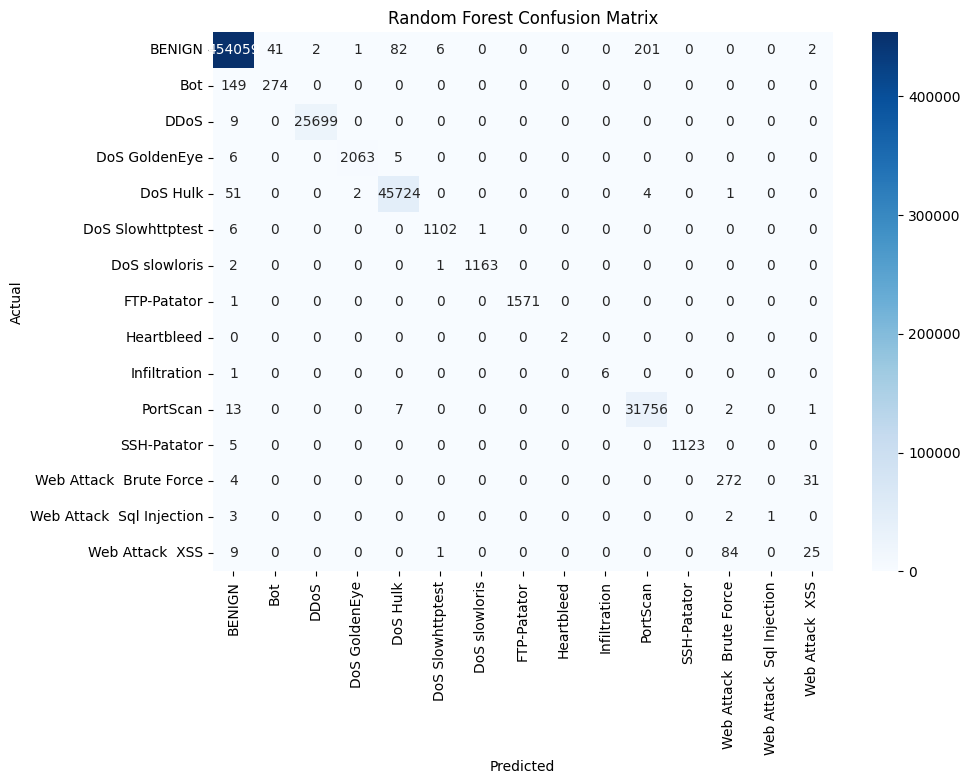

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Model Evaluation for RF
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted', labels=np.unique(rf_pred))
rf_precision = precision_score(y_test, rf_pred, average='weighted', labels=np.unique(rf_pred))
rf_recall = recall_score(y_test, rf_pred, average='weighted', labels=np.unique(rf_pred))

print('\nRandom Forest Metrics: ')
print(f'Accuracy : {rf_accuracy :.4f}')
print(f'F1 Score : {rf_f1 :.4f}')
print(f'Precision : {rf_precision :.4f}')
print(f'Recall : {rf_recall :.4f}')

plot_confusion_matrix(y_test, rf_pred, list(label_mapping.keys()), 'Random Forest Confusion Matrix')



ID3 Metrics: 
Accuracy : 0.9985
F1 Score : 0.9985
Precision : 0.9985
Recall : 0.9985


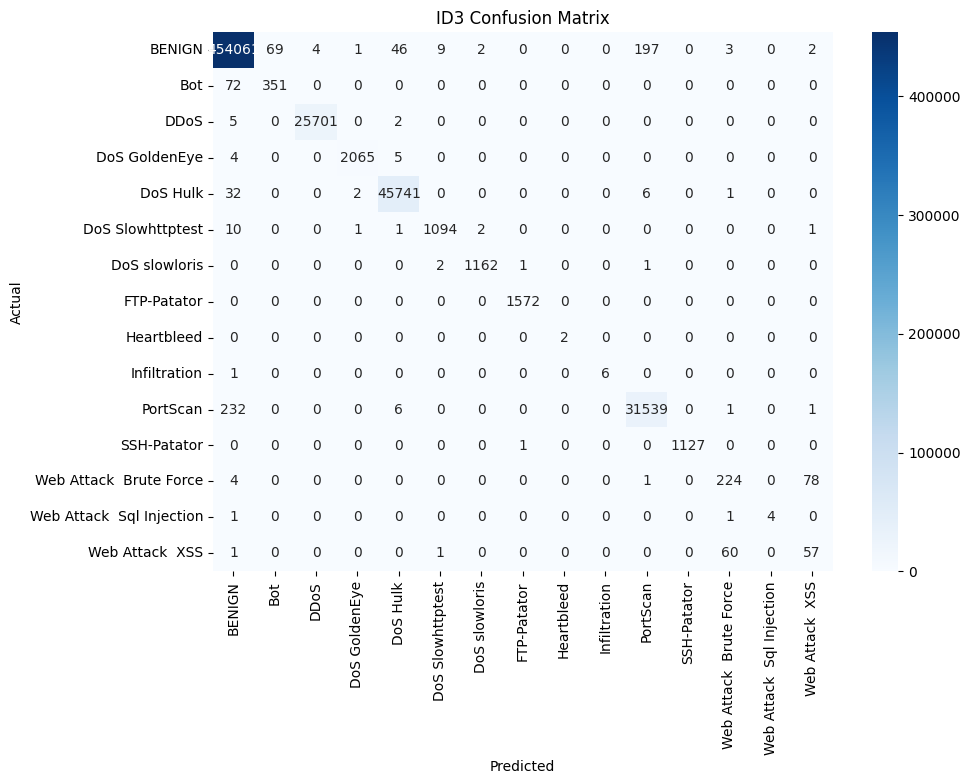

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Training the ID3 model
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)
id3_pred = id3_model.predict(X_test)

# Model Evaluation for ID3
id3_accuracy = accuracy_score(y_test, id3_pred)
id3_f1 = f1_score(y_test, id3_pred, average='weighted', labels=np.unique(id3_pred))
id3_precision = precision_score(y_test, id3_pred, average='weighted', labels=np.unique(id3_pred))
id3_recall = recall_score(y_test, id3_pred, average='weighted', labels=np.unique(id3_pred))

print('\nID3 Metrics: ')
print(f'Accuracy : {id3_accuracy :.4f}')
print(f'F1 Score : {id3_f1 :.4f}')
print(f'Precision : {id3_precision :.4f}')
print(f'Recall : {id3_recall :.4f}')

plot_confusion_matrix(y_test, id3_pred, list(label_mapping.keys()), 'ID3 Confusion Matrix')


/home/zeenx1popos/Documents/codes/summer project 1/.conda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Adaboost Metrics: 
Accuracy : 0.8569
F1 Score : 0.9088
Precision : 0.8557
Recall : 0.9690


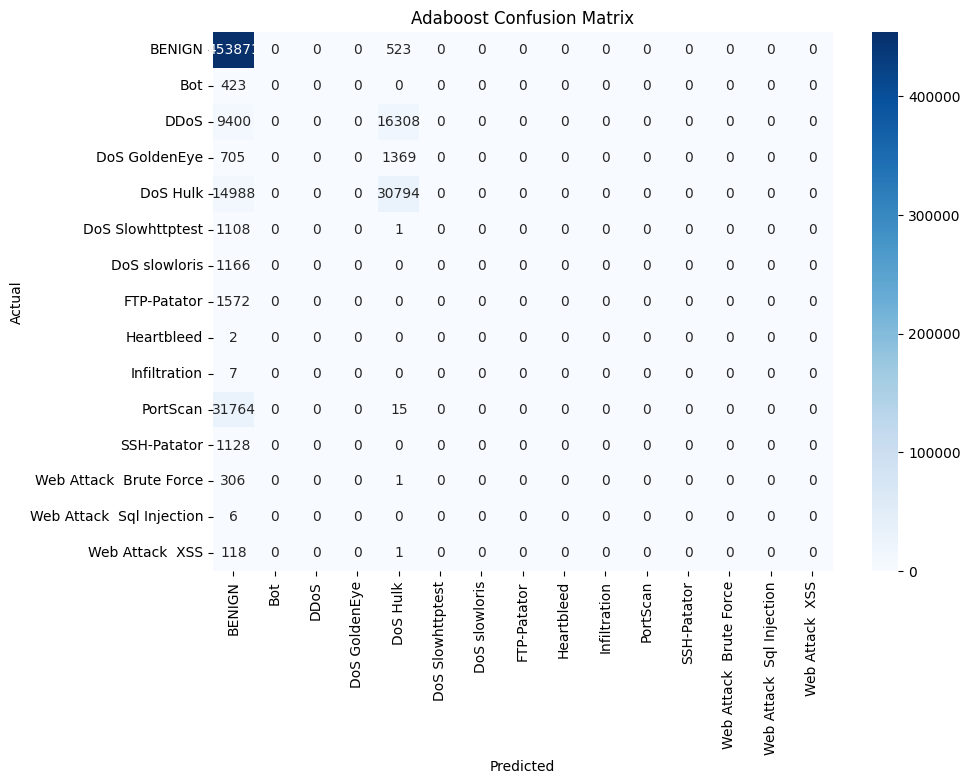

In [8]:
from sklearn.ensemble import AdaBoostClassifier

# Training the Adaboost model
ab_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)

# Model Evaluation for Adaboost
ab_accuracy = accuracy_score(y_test, ab_pred)
ab_f1 = f1_score(y_test, ab_pred, average='weighted', labels=np.unique(ab_pred))
ab_precision = precision_score(y_test, ab_pred, average='weighted', labels=np.unique(ab_pred))
ab_recall = recall_score(y_test, ab_pred, average='weighted', labels=np.unique(ab_pred))

print('\nAdaboost Metrics: ')
print(f'Accuracy : {ab_accuracy :.4f}')
print(f'F1 Score : {ab_f1 :.4f}')
print(f'Precision : {ab_precision :.4f}')
print(f'Recall : {ab_recall :.4f}')

plot_confusion_matrix(y_test, ab_pred, list(label_mapping.keys()), 'Adaboost Confusion Matrix')



Multilayer Perceptron Metrics: 
Accuracy : 0.9953
F1 Score : 0.9950
Precision : 0.9953
Recall : 0.9954


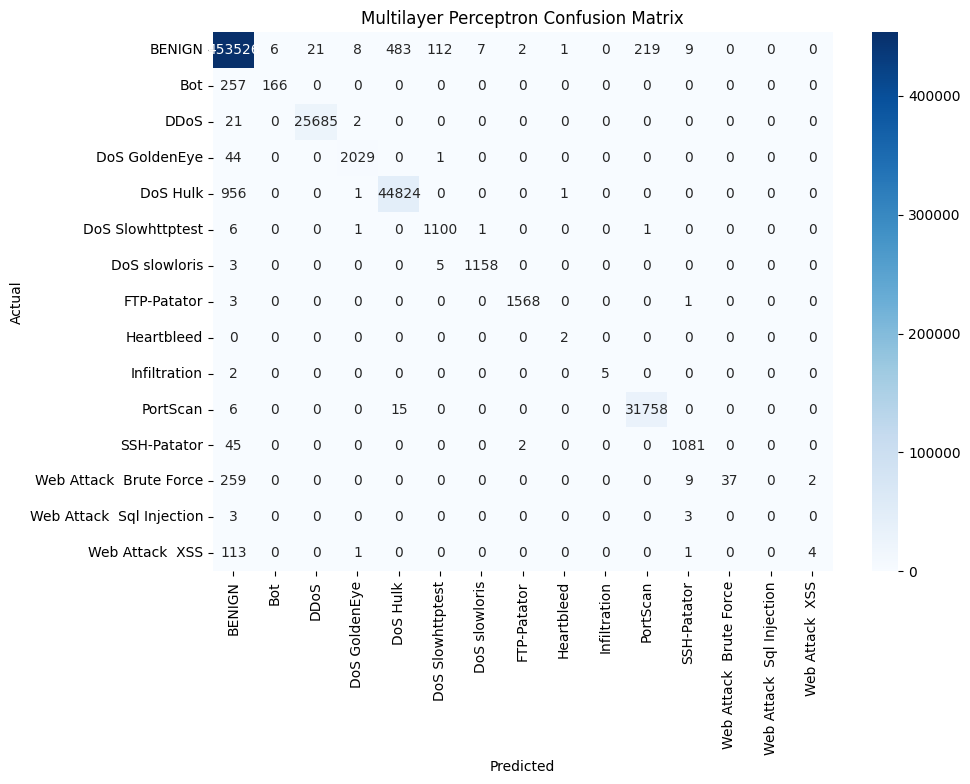

In [9]:
from sklearn.neural_network import MLPClassifier

# Training the Multilayer Perceptron model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

# Model Evaluation for MLP
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted', labels=np.unique(mlp_pred))
mlp_precision = precision_score(y_test, mlp_pred, average='weighted', labels=np.unique(mlp_pred))
mlp_recall = recall_score(y_test, mlp_pred, average='weighted', labels=np.unique(mlp_pred))

print('\nMultilayer Perceptron Metrics: ')
print(f'Accuracy : {mlp_accuracy :.4f}')
print(f'F1 Score : {mlp_f1 :.4f}')
print(f'Precision : {mlp_precision :.4f}')
print(f'Recall : {mlp_recall :.4f}')

plot_confusion_matrix(y_test, mlp_pred, list(label_mapping.keys()), 'Multilayer Perceptron Confusion Matrix')



Naive Bayes Metrics: 
Accuracy : 0.6911
F1 Score : 0.7988
Precision : 0.9725
Recall : 0.6911


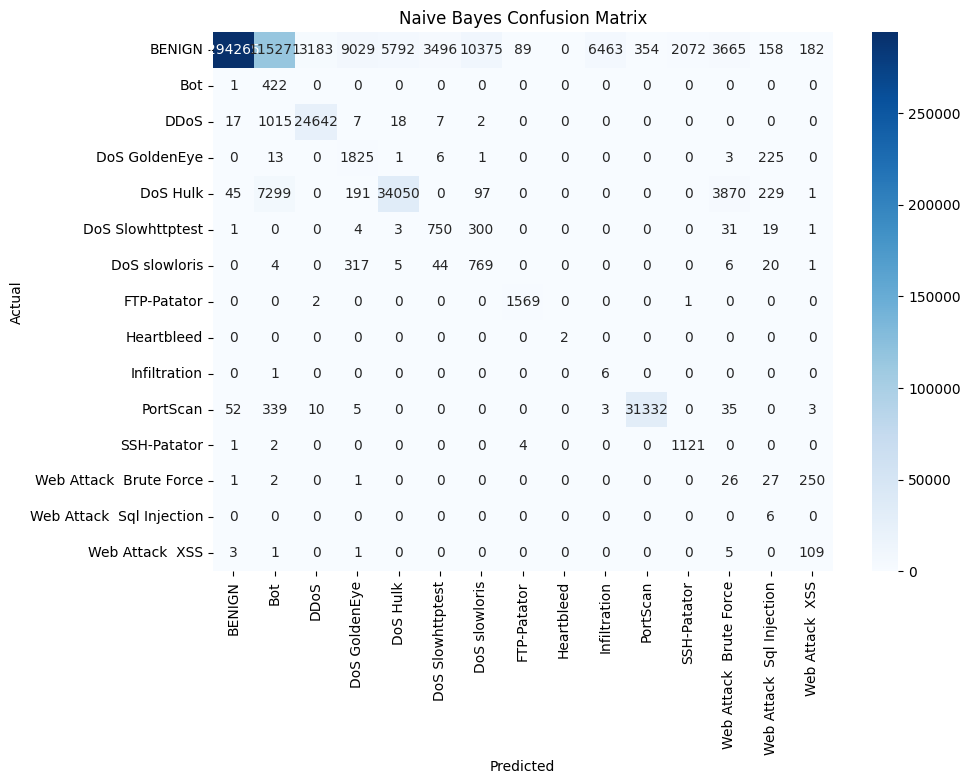

In [10]:
from sklearn.naive_bayes import GaussianNB

# Training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Model Evaluation for NB
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted', labels=np.unique(nb_pred))
nb_precision = precision_score(y_test, nb_pred, average='weighted', labels=np.unique(nb_pred))
nb_recall = recall_score(y_test, nb_pred, average='weighted', labels=np.unique(nb_pred))

print('\nNaive Bayes Metrics: ')
print(f'Accuracy : {nb_accuracy :.4f}')
print(f'F1 Score : {nb_f1 :.4f}')
print(f'Precision : {nb_precision :.4f}')
print(f'Recall : {nb_recall :.4f}')

plot_confusion_matrix(y_test, nb_pred, list(label_mapping.keys()), 'Naive Bayes Confusion Matrix')


/home/zeenx1popos/Documents/codes/summer project 1/.conda/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quadratic Discriminant Analysis Metrics: 
Accuracy : 0.9626
F1 Score : 0.9745
Precision : 0.9892
Recall : 0.9626


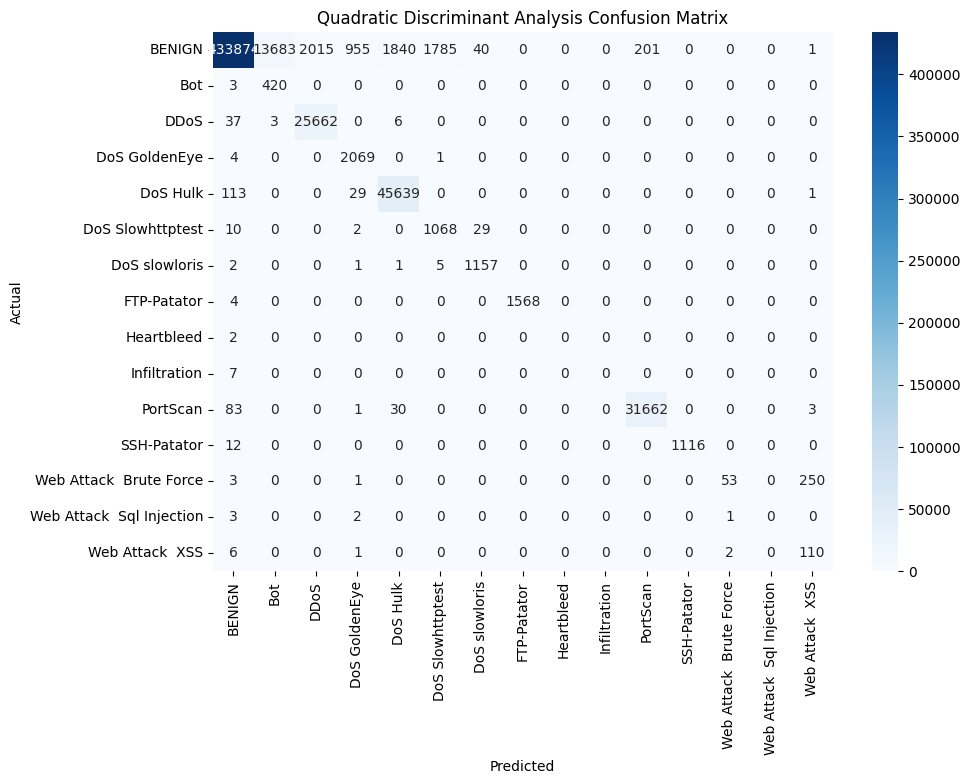

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Training the Quadratic Discriminant Analysis model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_pred = qda_model.predict(X_test)

# Model Evaluation for QDA
qda_accuracy = accuracy_score(y_test, qda_pred)
qda_f1 = f1_score(y_test, qda_pred, average='weighted', labels=np.unique(qda_pred))
qda_precision = precision_score(y_test, qda_pred, average='weighted', labels=np.unique(qda_pred))
qda_recall = recall_score(y_test, qda_pred, average='weighted', labels=np.unique(qda_pred))

print('\nQuadratic Discriminant Analysis Metrics: ')
print(f'Accuracy : {qda_accuracy :.4f}')
print(f'F1 Score : {qda_f1 :.4f}')
print(f'Precision : {qda_precision :.4f}')
print(f'Recall : {qda_recall :.4f}')

plot_confusion_matrix(y_test, qda_pred, list(label_mapping.keys()), 'Quadratic Discriminant Analysis Confusion Matrix')
